# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Load Data 
data = pd.read_csv("/content/drive/MyDrive/Tobigs/week2/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [6]:
data.info() #object형이 상당히 많은것을 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### 상관계수 그려보기

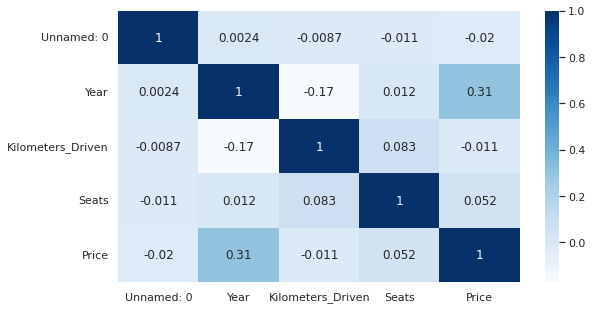

In [7]:
#상관계수 그려보기
sns.set(rc = {'figure.figsize':(9,5)})
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot = True) #눈에 두드러지는 상관계수는 없다.

### 범주형 변수 EDA

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


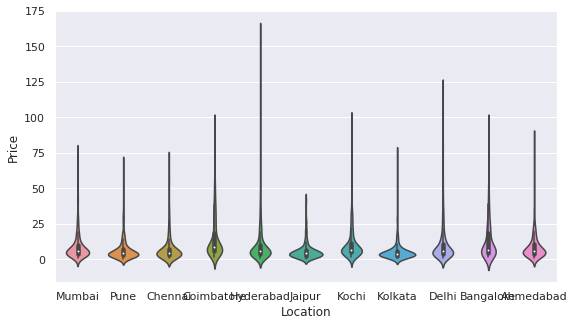

In [8]:
#범주형 변수 바이올린 플롯 그려보기
print(data['Location'].unique())
sns.violinplot(x="Location",y="Price", data=data)
plt.show()

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


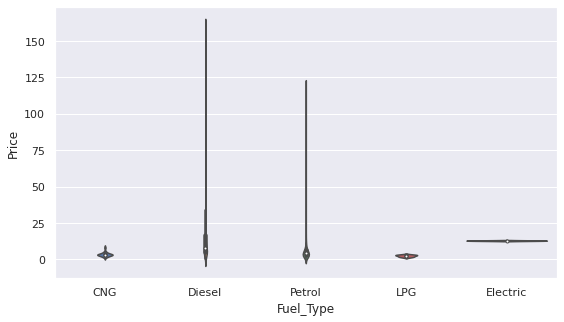

In [10]:
print(data['Fuel_Type'].unique())
sns.violinplot(x="Fuel_Type",y="Price", data=data)
plt.show()

['Manual' 'Automatic']


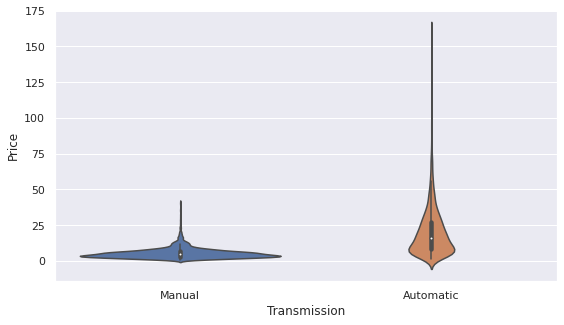

In [11]:
print(data['Transmission'].unique())
sns.violinplot(x="Transmission",y="Price", data=data)
plt.show()

['First' 'Second' 'Fourth & Above' 'Third']


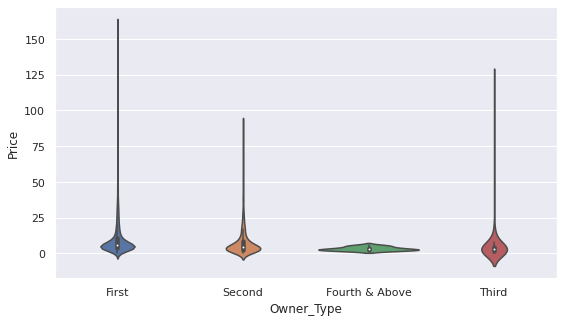

In [12]:
print(data['Owner_Type'].unique())
sns.violinplot(x="Owner_Type",y="Price", data=data)
plt.show()

In [13]:
print(data['Mileage'].unique()) #뒤에 단위 때문에 object처리 되었음: 전처리 필요함

['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl'
 '16.55 kmpl' '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl'
 '15.04 kmpl' '25.17 kmpl' '20.36 kmpl' '13.29 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '8.5 kmpl' '15.1 kmpl' '16.95 kmpl' '19.64 kmpl' '16.5 kmpl' '18.53 kmpl'
 '17.57 kmpl' '18.0 kmpl' '23.2 kmpl' '16.73 kmpl' '17.0 kmpl' '13.0 kmpl'
 '17.68 kmpl' '22.7 kmpl' '16.2 kmpl' '15.26 kmpl' '23.0 kmpl'

In [14]:
print(data['Engine'].unique()) #뒤에 단위 때문에 object처리 되었음: 전처리 필요함

['998 CC' '1582 CC' '1199 CC' '1248 CC' '1968 CC' '814 CC' '1461 CC'
 '2755 CC' '1598 CC' '1462 CC' '1497 CC' '2179 CC' '2477 CC' '1498 CC'
 '2143 CC' '1995 CC' '1984 CC' '1197 CC' '2494 CC' '1798 CC' '2696 CC'
 '2698 CC' '1061 CC' '1198 CC' '2987 CC' '796 CC' '624 CC' '1999 CC'
 '1991 CC' '2694 CC' '1120 CC' '2498 CC' '799 CC' '2393 CC' '1399 CC'
 '1796 CC' '2148 CC' '1396 CC' '1950 CC' '4806 CC' '1998 CC' '1086 CC'
 '1193 CC' '2982 CC' '1493 CC' '2967 CC' '2993 CC' '1196 CC' '1799 CC'
 '2497 CC' '2354 CC' '1373 CC' '2996 CC' '1591 CC' '2894 CC' '5461 CC'
 '1595 CC' '936 CC' '1997 CC' nan '1896 CC' '1390 CC' '1364 CC' '2199 CC'
 '993 CC' '999 CC' '1405 CC' '2956 CC' '1794 CC' '995 CC' '2496 CC'
 '1599 CC' '2400 CC' '1495 CC' '2523 CC' '793 CC' '4134 CC' '1596 CC'
 '1395 CC' '2953 CC' '1586 CC' '2362 CC' '1496 CC' '1368 CC' '1298 CC'
 '1956 CC' '1299 CC' '3498 CC' '2835 CC' '1150 CC' '3198 CC' '1343 CC'
 '1499 CC' '1186 CC' '1590 CC' '2609 CC' '2499 CC' '2446 CC' '1978 CC'
 '2360 CC' '

In [15]:
print(data['Power'].unique()) #뒤에 단위 때문에 object처리 되었음: 전처리 필요함

['58.16 bhp' '126.2 bhp' '88.7 bhp' '88.76 bhp' '140.8 bhp' '55.2 bhp'
 '63.1 bhp' '171.5 bhp' '103.6 bhp' '74 bhp' '103.25 bhp' '116.3 bhp'
 '187.7 bhp' '115 bhp' '175.56 bhp' '98.6 bhp' '83.8 bhp' '167.62 bhp'
 '190 bhp' '88.5 bhp' '177.01 bhp' '80 bhp' '67.1 bhp' '102 bhp'
 '108.45 bhp' '138.1 bhp' '184 bhp' '179.5 bhp' '103.5 bhp' '64 bhp'
 '82 bhp' '254.8 bhp' '73.9 bhp' '46.3 bhp' '37.5 bhp' '77 bhp' '82.9 bhp'
 '149.92 bhp' '138.03 bhp' '112.2 bhp' '163.7 bhp' '71 bhp' '105 bhp'
 '174.33 bhp' '75 bhp' '103.2 bhp' '53.3 bhp' '78.9 bhp' '147.6 bhp'
 '147.8 bhp' '68 bhp' '186 bhp' '170 bhp' '69 bhp' '140 bhp' '78 bhp'
 '194 bhp' '500 bhp' '108.5 bhp' '86.8 bhp' '187.74 bhp' 'null bhp'
 '132 bhp' '86.7 bhp' '73.94 bhp' '117.3 bhp' '218 bhp' '168.5 bhp'
 '89.84 bhp' '110 bhp' '90 bhp' '82.85 bhp' '67 bhp' '241.4 bhp' '35 bhp'
 '270.9 bhp' '126.32 bhp' '73 bhp' '130 bhp' '100.6 bhp' '150 bhp'
 '75.94 bhp' '215 bhp' '107.3 bhp' '37.48 bhp' '120 bhp' '178 bhp'
 '152 bhp' '91.1 bhp' '85.

### 전처리 하기

In [26]:
 data=data.drop('New_Price',axis=1)

In [27]:
data=data.drop('Unnamed: 0',axis=1)

In [28]:
data=data.dropna()
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [29]:
data=data.reset_index()
data

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [30]:
data=data.drop('index',axis=1)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


슬라이싱 연습

In [ ]:
data['Mileage'][1][:-5]

'19.67'

In [ ]:
data['Engine'][0][:-3]

'998'

In [ ]:
data['Power'][0][:-4]

'58.16'

뒤에 단위 제거 후 실수형으로 dtype 바꾸기

In [31]:
for i in range(len(data)):
  data['Mileage'][i]=data['Mileage'][i][:-5]
  data['Engine'][i]=data['Engine'][i][:-3]
  data['Power'][i]=data['Power'][i][:-4]
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [38]:
for i in range(len(data)):
  if data['Power'][i]=="null":
    data= data.drop(i, axis = 0)

In [39]:
data=data.astype({'Mileage':'float','Engine':'float','Power':'float'})

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 725.4+ KB


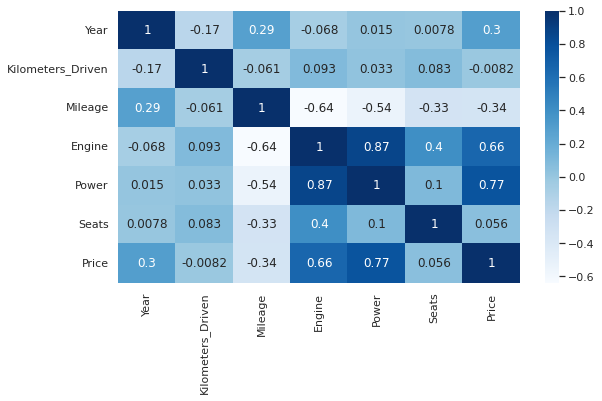

In [41]:
sns.set(rc = {'figure.figsize':(9,5)})
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot = True) #단위 때문에 str처리가 되었던 data를 단위를 제거하고 실수변환을 했더니 상관계수가 높은 변수가 생겼다.

변수의 다양성이 줄어들수록 정확도가 내려가기 때문에, 나머지 범주형 변수도 라벨링이나 원핫 인코딩 처리를 해준다.

In [42]:
a=data['Name']
data=data.drop("Name",axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [47]:
class_label = LabelEncoder()
data['location']=class_label.fit_transform(data['Location'])
data=pd.get_dummies(data=data,columns=['Fuel_Type','Transmission','Owner_Type'])
data

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,location,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,9,1,0,0,0,0,1,1,0,0,0
1,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,10,0,1,0,0,0,1,1,0,0,0
2,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,2,0,0,0,1,0,1,1,0,0,0
3,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,2,0,1,0,0,0,1,1,0,0,0
4,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,3,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Delhi,2014,27365,28.40,1248.0,74.00,5.0,4.75,4,0,1,0,0,0,1,1,0,0,0
5971,Jaipur,2015,100000,24.40,1120.0,71.00,5.0,4.00,6,0,1,0,0,0,1,1,0,0,0
5972,Jaipur,2012,55000,14.00,2498.0,112.00,8.0,2.90,6,0,1,0,0,0,1,0,0,1,0
5973,Kolkata,2013,46000,18.90,998.0,67.10,5.0,2.65,8,0,0,0,1,0,1,1,0,0,0


In [50]:
data=data.drop("Location",axis=1)
data=pd.concat([data,a],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5872 non-null   int64  
 1   Kilometers_Driven          5872 non-null   int64  
 2   Mileage                    5872 non-null   float64
 3   Engine                     5872 non-null   float64
 4   Power                      5872 non-null   float64
 5   Seats                      5872 non-null   float64
 6   Price                      5872 non-null   float64
 7   location                   5872 non-null   int64  
 8   Fuel_Type_CNG              5872 non-null   uint8  
 9   Fuel_Type_Diesel           5872 non-null   uint8  
 10  Fuel_Type_LPG              5872 non-null   uint8  
 11  Fuel_Type_Petrol           5872 non-null   uint8  
 12  Transmission_Automatic     5872 non-null   uint8  
 13  Transmission_Manual        5872 non-null   uint8

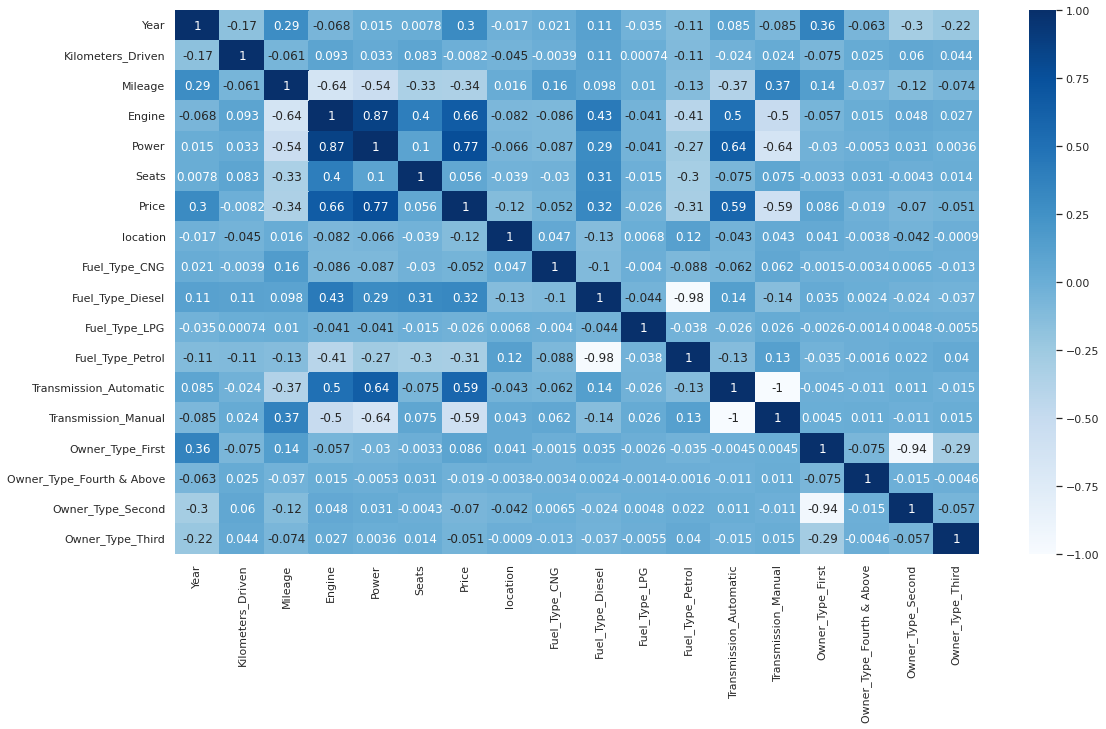

In [52]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot = True) #transmission의 여부도 price와 높은 상관관계를 보인다.

## 다변량선형회귀분석

In [56]:
from sklearn.model_selection import train_test_split
y = data['Price'] 
x = data.drop(['Price','Name'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [58]:
y_predict = mlr.predict(x_test)

In [59]:
a=mlr.score(x_test,y_test)
print(a)

0.6779534466205459
